In [ ]:
import kaggle

In [ ]:
! mv kaggle.json /root/.kaggle

In [ ]:
import kaggle

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 97% 790M/812M [00:10<00:00, 108MB/s]
100% 812M/812M [00:10<00:00, 83.7MB/s]


In [ ]:
! unzip -q dogs-vs-cats.zip

In [ ]:
! unzip -q train.zip

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import tensorflow as tf

In [ ]:

os.listdir("train") #share the content in that particualar folder

['cat.712.jpg',
 'cat.2817.jpg',
 'cat.1587.jpg',
 'cat.11513.jpg',
 'dog.8522.jpg',
 'dog.5417.jpg',
 'dog.4098.jpg',
 'cat.5489.jpg',
 'cat.7298.jpg',
 'cat.4808.jpg',
 'dog.2397.jpg',
 'dog.9342.jpg',
 'dog.8953.jpg',
 'cat.10585.jpg',
 'cat.7732.jpg',
 'cat.10375.jpg',
 'dog.100.jpg',
 'cat.1550.jpg',
 'dog.1533.jpg',
 'cat.6663.jpg',
 'dog.2230.jpg',
 'cat.822.jpg',
 'cat.9579.jpg',
 'cat.5972.jpg',
 'dog.3922.jpg',
 'dog.8873.jpg',
 'cat.2242.jpg',
 'dog.9708.jpg',
 'dog.10868.jpg',
 'dog.7551.jpg',
 'dog.4606.jpg',
 'cat.5793.jpg',
 'dog.4303.jpg',
 'cat.7931.jpg',
 'dog.739.jpg',
 'cat.8606.jpg',
 'cat.2733.jpg',
 'cat.2379.jpg',
 'cat.12490.jpg',
 'dog.10097.jpg',
 'dog.8971.jpg',
 'cat.3816.jpg',
 'cat.5324.jpg',
 'dog.7091.jpg',
 'cat.1559.jpg',
 'dog.7711.jpg',
 'cat.4397.jpg',
 'cat.4598.jpg',
 'dog.4765.jpg',
 'dog.6548.jpg',
 'cat.1110.jpg',
 'dog.9300.jpg',
 'dog.7654.jpg',
 'cat.6163.jpg',
 'dog.3593.jpg',
 'cat.8390.jpg',
 'cat.1128.jpg',
 'dog.11412.jpg',
 'dog.12186

In [ ]:
len(os.listdir("train"))

25000

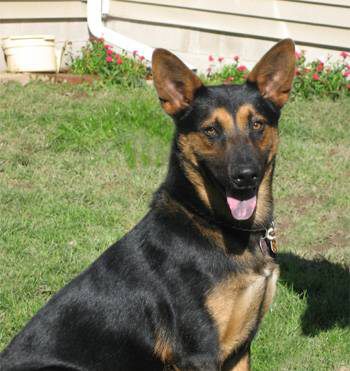

In [ ]:
Image.open("train/dog.2811.jpg")

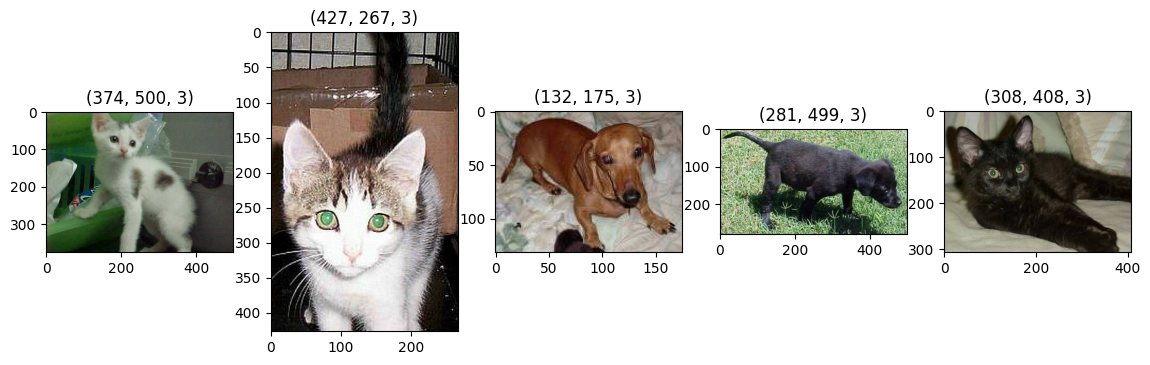

In [ ]:
plt.figure(figsize=(14,8))
for i in range(1,6):
  plt.subplot(1,5,i)
  image = "train/" + np.random.choice(os.listdir("train"))
  image = cv2.imread(image)
  plt.title(image.shape)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image)

In [ ]:
#Ques : Find the best shape for images to be resized make histogram for height
#Find mean and skewness
#For this session we will take (150,150)

In [ ]:
import statistics

In [ ]:
#Finding Median height
def median_height_width():
  img_height =[]
  img_width =[]
  dir =os.listdir("train")
  for image_name in dir:
    #print(f"1 :{image_name}")
    #image = "train/" + np.random.choice(os.listdir("train"))
    image_path = os.path.join("train", image_name)
    image = cv2.imread(image_path)
    #image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    height, width, _ = image.shape
    img_height.append(height)
    img_width.append(width)
    print("Image heights:", img_height)
    print("Image widths:", img_width)
    return(statistics.median(img_height),statistics.median(img_width))

In [ ]:
median_height,median_width = median_height_width()
print(f"Median Height :{median_height}")
print(f"Median Width :{median_width}")

Image heights: [500]
Image widths: [201]
Median Height :500
Median Width :201


In [ ]:
import os
import cv2
import pandas as pd

def load_images_data(image_dir):
    data = []
    for image_name in os.listdir(image_dir):
        image_path = os.path.join(image_dir, image_name)
        image = cv2.imread(image_path)
        if image is not None:
            height, width, _ = image.shape
            data.append({'Image': image_name, 'Height': height, 'Width': width})
        else:
            print(f"Error reading image: {image_path}")

    df = pd.DataFrame(data)
    return df

# Load the image data into a DataFrame
image_directory = "train"
df = load_images_data(image_directory)

# Compute the descriptive statistics
description = df.describe()
print(description)


             Height        Width
count  25000.000000  25000.00000
mean     360.478080    404.09904
std       97.019959    109.03793
min       32.000000     42.00000
25%      301.000000    323.00000
50%      374.000000    447.00000
75%      421.000000    499.00000
max      768.000000   1050.00000


In [ ]:
#From this we get mean as 360.047 and 404.099

In [ ]:
import os
import cv2
import pandas as pd

def load_images_data(image_dir):
    dog_height = []
    dog_width = []
    cat_height = []
    cat_width = []
    for image_name in os.listdir(image_dir):
        image_path = os.path.join(image_dir, image_name)
        image = cv2.imread(image_path)
        if image is not None:
            height, width, _ = image.shape
            if 'dog' in image_name:
                dog_height.append({'Image': image_name, 'Height': height})
                dog_width.append({'Image': image_name, 'Width': width})
            else:
                cat_height.append({'Image': image_name, 'Height': height})
                cat_width.append({'Image': image_name, 'Width': width})
        else:
            print(f"Error reading image: {image_path}")

    df_dog_height = pd.DataFrame(dog_height)
    df_dog_width = pd.DataFrame(dog_width)
    df_cat_height = pd.DataFrame(cat_height)
    df_cat_width = pd.DataFrame(cat_width)

    return df_dog_height, df_dog_width, df_cat_height, df_cat_width

# Load the image data into separate DataFrames for dogs and cats
image_directory = "train"
df_dog_height, df_dog_width, df_cat_height, df_cat_width = load_images_data(image_directory)

# Compute the descriptive statistics for each DataFrame
description_dog_height = df_dog_height.describe()
description_dog_width = df_dog_width.describe()
description_cat_height = df_cat_height.describe()
description_cat_width = df_cat_width.describe()

print(f"Dog Height: {description_dog_height}")
print(f"\nDog Width:{description_dog_width}")

print(f"\nCat Height:{description_cat_height}")
print(f"\nCat Width:{description_cat_width}")

# Calculate the median for each DataFrame
median_dog_height = statistics.median(df_dog_height['Height'])
median_dog_width = statistics.median(df_dog_width['Width'])
median_cat_height = statistics.median(df_cat_height['Height'])
median_cat_width = statistics.median(df_cat_width['Width'])

print("Dog Height Median:", median_dog_height)
print("Dog Width Median:", median_dog_width)
print("Cat Height Median:", median_cat_height)
print("Cat Width Median:", median_cat_width)



Dog Height:              Height
count  12500.000000
mean     364.489040
std       97.349489
min       33.000000
25%      306.750000
50%      374.000000
75%      434.000000
max      702.000000

Dog Width:              Width
count  12500.000000
mean     397.675440
std      109.810161
min       42.000000
25%      319.000000
50%      423.000000
75%      499.000000
max     1050.000000

Cat Height:             Height
count  12500.000000
mean     356.467120
std       96.526665
min       32.000000
25%      300.000000
50%      374.000000
75%      406.250000
max      768.000000

Cat Width:              Width
count  12500.000000
mean     410.522640
std      107.882752
min       50.000000
25%      334.000000
50%      470.000000
75%      499.000000
max     1023.000000
Dog Height Median: 374.0
Dog Width Median: 423.0
Cat Height Median: 374.0
Cat Width Median: 470.0


In [ ]:
'''We have mean of:
dog height and width as : 364.489040 and 397.675440
and median as : 374.0   423.0
cat mean :
height and width: 356.467120  and 410.522640
median :          374.0  and  470.0
'''


'We have mean of:\ndog height and width as : 364.489040 and 397.675440\nand median as : 374.0   423.0\ncat mean :\nheight and width: 356.467120  and 410.522640\nmedian :          374.0  and  470.0\n'

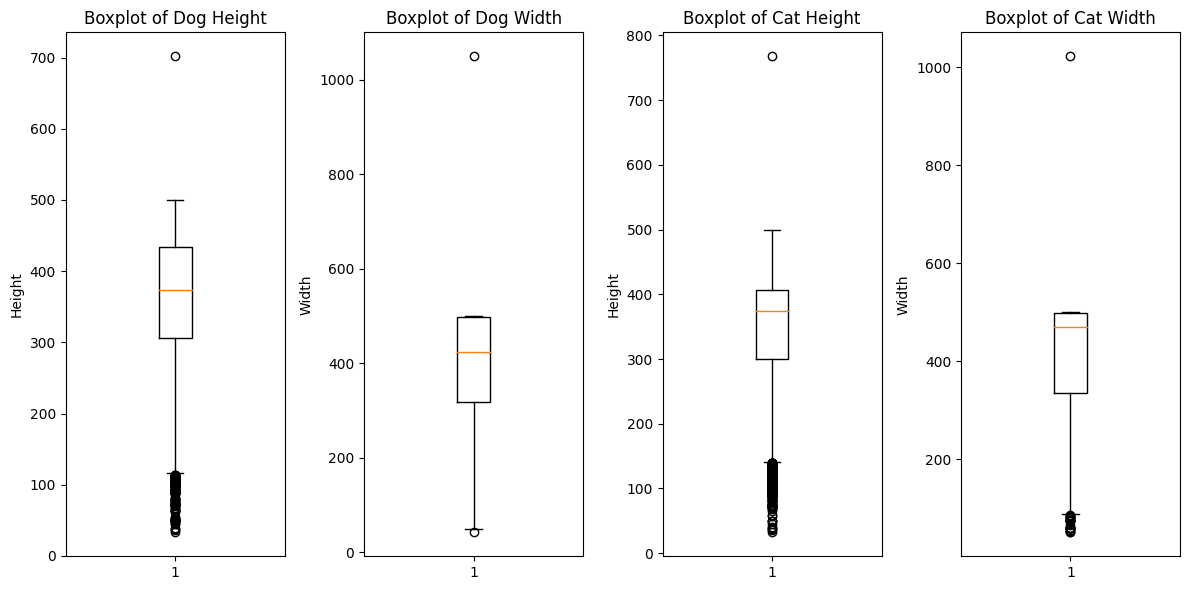

In [ ]:
#Plotting BOX PLOT
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def load_images_data(image_dir):
    dog_height = []
    dog_width = []
    cat_height = []
    cat_width = []
    for image_name in os.listdir(image_dir):
        image_path = os.path.join(image_dir, image_name)
        image = cv2.imread(image_path)
        if image is not None:
            height, width, _ = image.shape
            if 'dog' in image_name:
                dog_height.append(height)
                dog_width.append(width)
            else:
                cat_height.append(height)
                cat_width.append(width)
        else:
            print(f"Error reading image: {image_path}")

    return dog_height, dog_width, cat_height, cat_width

# Taking a square dimension and 350
# Plotting box plots
# Separate boxplots for dog and cat height and width:
image_directory = "train"
df_dog_height, df_dog_width, df_cat_height, df_cat_width = load_images_data(image_directory)

plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.boxplot(df_dog_height)
plt.ylabel('Height')
plt.title('Boxplot of Dog Height')

plt.subplot(1, 4, 2)
plt.boxplot(df_dog_width)
plt.ylabel('Width')
plt.title('Boxplot of Dog Width')

plt.subplot(1, 4, 3)
plt.boxplot(df_cat_height)
plt.ylabel('Height')
plt.title('Boxplot of Cat Height')

plt.subplot(1, 4, 4)
plt.boxplot(df_cat_width)
plt.ylabel('Width')
plt.title('Boxplot of Cat Width')

plt.tight_layout()
plt.show()


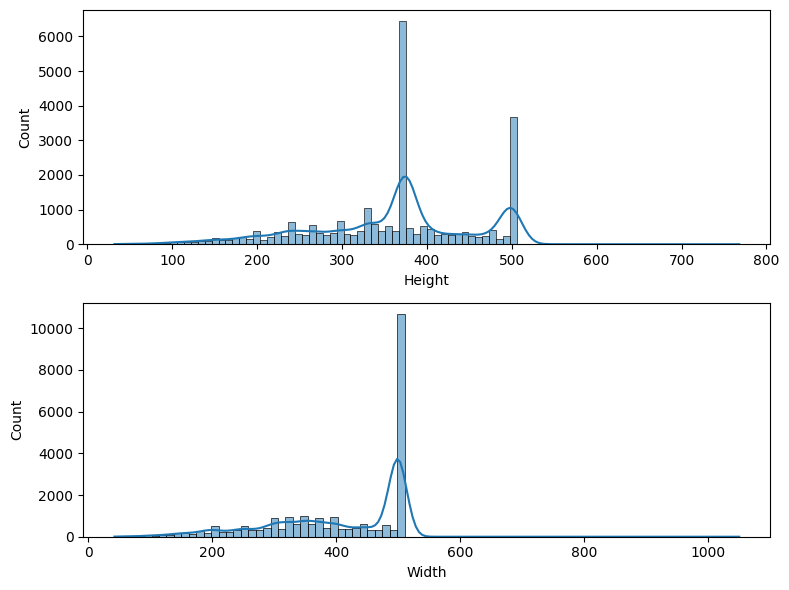

In [ ]:
#Plotting pdf
import seaborn as sns
def load_images_data(image_dir):
    data = []
    for image_name in os.listdir(image_dir):
        image_path = os.path.join(image_dir, image_name)
        image = cv2.imread(image_path)
        if image is not None:
            height, width, _ = image.shape
            data.append({'Image': image_name, 'Height': height, 'Width': width})
        else:
            print(f"Error reading image: {image_path}")

    df = pd.DataFrame(data)
    return df

# Load the image data into a DataFrame
image_directory = "train"
df = load_images_data(image_directory)

# Plot PDFs of height and width
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
sns.histplot(df['Height'], kde=True)
plt.xlabel('Height')
plt.subplot(2, 1, 2)
sns.histplot(df['Width'], kde=True)
plt.xlabel('Width')
plt.tight_layout()

plt.show()


In [ ]:
allImages = []
allLabels = []
for imageName in os.listdir("train"): #iterate over the train folder to get all the files
  imageName = "train/" + imageName    #add folder name in the filename
  # raed the images
  image = cv2.imread(imageName)
  # convert from BGR2RGB
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  # resize the image to (150,150)
  image = cv2.resize(image, (150, 150))
  # normalize the images
  # image = image/255.0
  allImages.append(image)

  if "dog" in imageName:
    allLabels.append(1)
  else:
    allLabels.append(0)

In [ ]:
print(f"Length of allImages: {len(allImages)}")
print(f"Length of allLabels: {len(allLabels)}")

Length of allImages: 25000
Length of allLabels: 25000


In [ ]:
X = np.array(allImages)

In [ ]:
Y = np.array(allLabels)

In [ ]:
print(X.shape) # no. of images, height, width, channel
print(Y.shape) # no. of labeles

(25000, 150, 150, 3)
(25000,)


In [ ]:
# Split X into x_train, x_test, similarly Y into y_train and y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1)

In [ ]:
X_train.shape, y_train.shape

((22500, 150, 150, 3), (22500,))

In [ ]:
X_test.shape, y_test.shape

((2500, 150, 150, 3), (2500,))

In [ ]:
# tf.keras.preprocessing.image.ImageDataGenerator()
# That Image Data Generator requires you to have data in a particular format!

# Master Folder (train_data)
# |-> category1 (dogs)
#   |-> image1_dog
#   |-> image2_dog
#   |-> image3_dog
# |-> category2 (cats)
#   |-> image1_cat
#   |-> image2_cat
#   |-> image3_cat

In [ ]:
os.mkdir("train_data")
os.mkdir("train_data/dog")
os.mkdir("train_data/cat")

In [ ]:
import shutil
source_folder = "train/"
dest_dog ="train_data/dog"    #destination folders
dest_cat = "train_data/cat"

In [ ]:
for imageName in os.listdir(source_folder):
  if 'dog' in imageName:
    shutil.copy(source_folder + imageName,dest_dog)
  else:
    shutil.copy(source_folder + imageName,dest_cat)


In [ ]:
len(os.listdir("train_data/dog"))

12500

In [ ]:
len(os.listdir("train_data/cat"))

12500

In [ ]:
del model

In [ ]:
#Creating Image Data Generator
#validation_data
#Normalization
idg=tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.1,rescale=1/255.0)

In [ ]:
#Pre-processing images using 150,150 for faster processing after analysis we get 350,350
batch_size=512
train_idg = idg.flow_from_directory(directory ="train_data",target_size=(350,350),
                                    color_mode='rgb',batch_size=batch_size,
                                    subset="training")

Found 22500 images belonging to 2 classes.


In [ ]:
#It went inside and checked all the folders
#creating validation data
validation_idg = idg.flow_from_directory(directory ="train_data",target_size=(350,350),
                                         color_mode='rgb',batch_size=batch_size,
                                         subset="validation")


Found 2500 images belonging to 2 classes.


In [ ]:
#Creating Model
#Sequential Model
model = tf.keras.models.Sequential()
#Input Layer
model.add(tf.keras.layers.Input((350,350,3),name= 'InputLayer'))
#Flatten Layer
model.add(tf.keras.layers.Flatten(name='FlattenLayer'))
#Hidden Layer1
model.add(tf.keras.layers.Dense(256,activation=tf.keras.activations.relu,name = 'HiddenLayer1'))
#Hidden Layer 2
model.add(tf.keras.layers.Dense(64,activation=tf.keras.activations.relu,name='HiddenLayer2'))
#Output Layer
model.add(tf.keras.layers.Dense(2,activation=tf.keras.activations.softmax,name='OutputLayer'))

#Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 FlattenLayer (Flatten)      (None, 367500)            0         
                                                                 
 HiddenLayer1 (Dense)        (None, 256)               94080256  
                                                                 
 HiddenLayer2 (Dense)        (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 2)                 130       
                                                                 
Total params: 94,096,834
Trainable params: 94,096,834
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Model Compilation
model.compile(tf.keras.optimizers.SGD(),tf.keras.losses.categorical_crossentropy,
              metrics = ['acc'])

In [ ]:
#Fitting Model
model.fit(train_idg,batch_size=batch_size,epochs=10,validation_data=validation_idg)

Epoch 1/10
44/44 [==============================] - 338s 8s/step - loss: 2.3668 - acc: 0.5218 - val_loss: 0.6880 - val_acc: 0.5676
Epoch 2/10
44/44 [==============================] - 336s 8s/step - loss: 0.6844 - acc: 0.5612 - val_loss: 0.6800 - val_acc: 0.5788
Epoch 3/10
44/44 [==============================] - 317s 7s/step - loss: 0.6787 - acc: 0.5733 - val_loss: 0.6748 - val_acc: 0.5864
Epoch 4/10
44/44 [==============================] - 331s 8s/step - loss: 0.6751 - acc: 0.5845 - val_loss: 0.6701 - val_acc: 0.5892
Epoch 5/10
44/44 [==============================] - 360s 8s/step - loss: 0.6674 - acc: 0.5984 - val_loss: 0.6642 - val_acc: 0.5976
Epoch 6/10
44/44 [==============================] - 351s 8s/step - loss: 0.6657 - acc: 0.5992 - val_loss: 0.6668 - val_acc: 0.5892
Epoch 7/10
44/44 [==============================] - 331s 7s/step - loss: 0.6601 - acc: 0.6100 - val_loss: 0.6689 - val_acc: 0.5936
Epoch 8/10
44/44 [==============================] - 311s 7s/step - loss: 0.6632 - a

Text(0.5, 1.0, 'Accuracy of Model')

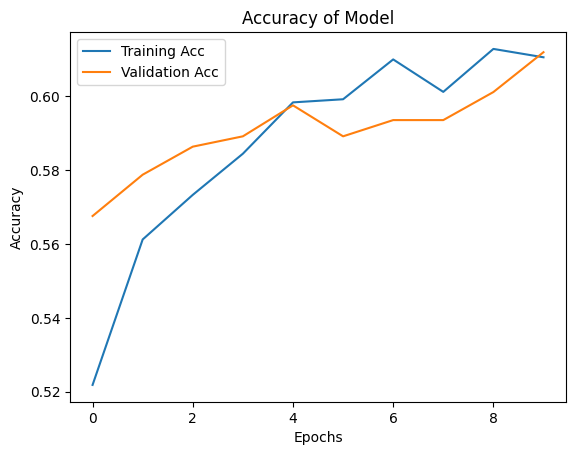

In [ ]:
#Plotting Acc vs Val Graph
plt.plot(model.history.history['acc'],label='Training Acc')
plt.plot(model.history.history['val_acc'],label='Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy of Model")

In [ ]:
#Plotting Losses (In DL We focus on Losses over accuracy)
plt.plot(model.history.history['loss'],label='Loss')
plt.plot(model.history.history['val_loss'],label='Val Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Losses of Model')

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True,show_layer_activations=True) #show layers wont work here read documentation